In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Dense, GlobalMaxPool1D, Conv1D, MaxPooling1D, LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('data', encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [19]:
df['Labels'] = df['v1'].map({'ham':0, 'spam':1})
df.rename(columns={'v2':'Message'}, inplace=True)
df = df.drop(['Unnamed: 2', 'Unnamed: 3',	'Unnamed: 4'], axis=1)
df

,v1,Message,Labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [20]:
X = df['Message']
y = df['Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
MAX_VOC = 20000
tokenizer = Tokenizer(num_words=MAX_VOC)
tokenizer.fit_on_texts(X_train)
seq_train = tokenizer.texts_to_sequences(X_train)
seq_test = tokenizer.texts_to_sequences(X_test)

In [22]:
word2idx = tokenizer.index_word
V = len(word2idx)
V

7954

In [23]:
X_train = pad_sequences(seq_train)
T = X_train.shape[1]
X_test = pad_sequences(seq_test, maxlen=T)

In [27]:
from tensorflow.keras.utils import set_random_seed
set_random_seed(42)

D = 20
M = 15

i = Input(shape=(T,))
x = Embedding(V +1, D)(i) # Since first index starts from 1 we put +1
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPool1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
r = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step - accuracy: 0.8451 - loss: 0.4703 - val_accuracy: 0.8655 - val_loss: 0.2217
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 100ms/step - accuracy: 0.9535 - loss: 0.1474 - val_accuracy: 0.9785 - val_loss: 0.0923
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9912 - loss: 0.0545 - val_accuracy: 0.9812 - val_loss: 0.0770
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.9950 - loss: 0.0320 - val_accuracy: 0.9857 - val_loss: 0.0698
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.9975 - loss: 0.0181 - val_accuracy: 0.9839 - val_loss: 0.0743
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.9992 - loss: 0.0115 - val_accuracy: 0.9848 - val_loss: 0.0664
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9991 - loss: 0.0096 - val_accuracy: 0.9848 - val_loss: 0.0714
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.9998 - loss: 0.0058 - va

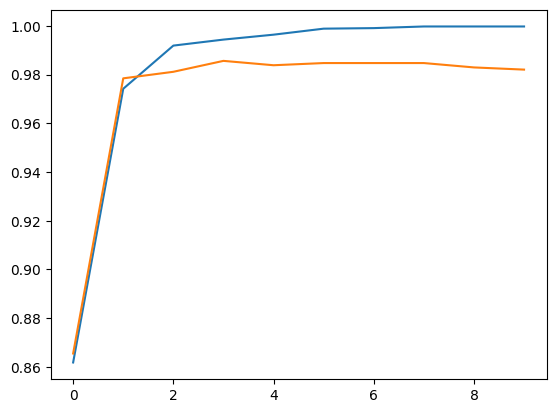

In [29]:
plt.plot(r.history['accuracy'])
plt.plot(r.history['val_accuracy'])

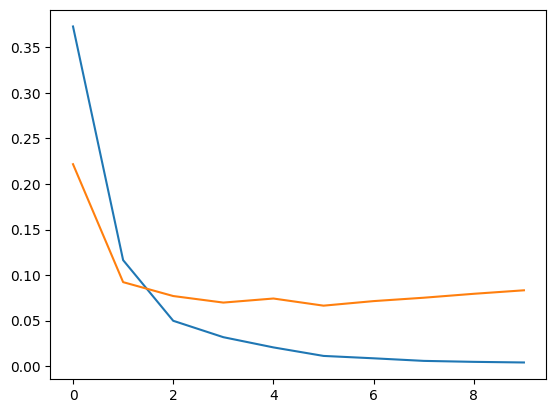

In [30]:
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])

In [31]:
model.save('data')